- 등/하원때마다 성수역 앞의 따릉이가 쌓여있는것을 보고 따릉이를 필요한곳에 더, 반납이 많은곳엔 덜 배치해서 따릉이의 이용률을 더 높힐 수 있을까? 라는 의문점에서 출발.

- 대여소 번호가 많은 순으로 랭킹을 선정해서 수요가 가장 많았던 스테이션을 추려내고
- 반대로 반납 대여소를 카운트해서 가장 많았던 스테이션도 추려내서

- 수요가 많은 곳에는 따릉이를 더 배치하고, 반납이 많았던 곳에는 따르이 배치를 덜 해서 효율성과 경제성을 도모 할 수 있는 인사이트 제시  

- 코로나팬대믹 이후로 사람들은 따릉이를 더 탈까 덜 탈까?
- 재택근무의 확대로 유동자체가 적어져서 따릉이 이용 횟수가 적어졌을까?
- 아니면 팬대믹으로 대중교통 이용에 불안감이 조성되어 따릉이로 출퇴근을 해서 더 많아졌을까? 라는 궁금점에서 출발.

* 7월과 8월의 비교
1. 19년도 7월과 20년도 7월의 이용량 비교 (코로나의 영향이 있는지)
2. 위 지표들간의 이용시간의 차이, 이용거리의 변화도 있는지 확인.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 파일 불러오기
# 19년 7월 데이터 불러와서 합치기
# 파일을 불러올 떄 utf-8을 인코딩 하려고 했으나 불가 cp949로 대체
sb1907_1 = pd.read_csv('datas/seoul_share_bike_201907_1.csv', 
                     encoding='cp949') 
sb1907_2 = pd.read_csv('datas/seoul_share_bike_201907_2.csv', 
                     encoding='cp949') 
sb1907_3 = pd.read_csv('datas/seoul_share_bike_201907_3.csv', 
                     encoding='cp949') 

sb1907 = pd.concat([sb1907_1, sb1907_2, sb1907_3])

# 19년 8월 데이터 불러와서 합치기
# 19년 7월 데이터와 동일하게 파일을 불러올 떄 utf-8을 인코딩 하려고 했으나 불가 cp949로 대체
sb1908_1 = pd.read_csv('datas/seoul_share_bike_201908_1.csv', 
                     encoding='cp949') 
sb1908_2 = pd.read_csv('datas/seoul_share_bike_201908_2.csv', 
                     encoding='cp949') 
sb1908_3 = pd.read_csv('datas/seoul_share_bike_201908_3.csv', 
                     encoding='cp949') 

sb1908 = pd.concat([sb1908_1, sb1908_2, sb1908_3])

In [3]:
# 20년 07월 20년08월 데이터 불러오기 
# 데이터를 나누어서 저장한 뒤 파일 불러옴
sb2007 = pd.read_csv('datas/sb2007.csv')
sb2008 = pd.read_csv('datas/sb2008.csv')

In [4]:
# 19년 7월 데이터 확인
sb1907.head(3)

자전거번호                 대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-21789  2019-07-02 08:35:17       646  장한평역 1번출구 (국민은행앞)      4   
1  SPB-22363  2019-07-03 08:35:06       646  장한평역 1번출구 (국민은행앞)      2   
2  SPB-24965  2019-07-03 08:46:07       646  장한평역 1번출구 (국민은행앞)      2   

                  반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간    이용거리  
0  2019-07-02 08:42:31        3   중랑센터      2     6  1350.0  
1  2019-07-03 08:42:28        3   중랑센터      2     7  1160.0  
2  2019-07-03 09:09:44        3   중랑센터     14    23  1270.0

In [5]:
# 19년 8월 데이터 확인
sb1908.head(3)

자전거번호                 대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-19492  2019-08-05 08:37:44       646  장한평역 1번출구 (국민은행앞)      8   
1  SPB-17426  2019-08-05 13:37:38         3               중랑센터      7   
2  SPB-17846  2019-08-06 08:40:00       646  장한평역 1번출구 (국민은행앞)      3   

                  반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간    이용거리  
0  2019-08-05 08:46:27        3   중랑센터      2     8  1360.0  
1  2019-08-05 13:41:29        3   중랑센터      7     3     0.0  
2  2019-08-06 08:47:56        3   중랑센터      2     7  1380.0

In [6]:
sb2007.head(3)

자전거번호                 대여일시  대여 대여소번호       대여 대여소명  대여거치대  \
0  SPB-11402  2020-07-01 00:00:15       610      동대문중 교차로     10   
1  SPB-32502  2020-07-01 00:00:40      1707        도봉구민회관      0   
2  SPB-33694  2020-07-01 00:00:17      2312  청담역 13번 출구 앞      0   

                  반납일시  반납대여소번호        반납대여소명  반납거치대  이용시간    이용거리  
0  2020-07-01 00:03:23      657  동대문롯데캐슬아파트 앞      1     3  450.00  
1  2020-07-01 00:04:30     1775      신원리베르텔 앞      0     4    0.00  
2  2020-07-01 00:05:10     2313        금원빌딩 앞      0     5  492.63

In [7]:
sb2008.head(3)

자전거번호                 대여일시  대여 대여소번호           대여 대여소명  대여거치대  \
0  SPB-31470  2020-08-01 00:00:01       714    한국SGI 양천문화회관 앞      0   
1  SPB-31925  2020-08-01 00:01:23      3533  건대입구역 사거리(롯데백화점)      0   
2  SPB-30837  2020-08-01 00:00:34      2634   위례포레샤인아파트 2318동      0   

                  반납일시  반납대여소번호   반납대여소명  반납거치대  이용시간  이용거리  
0  2020-08-01 00:03:47      740     으뜸공원      0     4   0.0  
1  2020-08-01 00:06:16     3566  우성4차아파트      0     5   0.0  
2  2020-08-01 00:06:20     2633   송파학사 옆      0     6   0.0

데이터들을 살펴보니 우리가 판단하기에 필요없는 컬럼들이 많고, 데이터 처리를 위해 컬럼명을 영어로 기재하는 것이 맞다고 판단했습니다.

#### 해당 작업들을 진행했습니다.
- 자전거 대여현황 함수 설정 
   - 한글컬럼명(자전거번호, 대여일시, 대여_대여소번호, 대여_대여소명, 반납일시, 반납대여소번호, 반납대여소_이름, 이용시간, 이용거리)을 영문으로 변경
   - 컬명중 '대여거치대'와 '반납거치대'는 필요없는 컬럼이라 판단, 제거하였습니다.
   - 컬럼중 '대여일시', '반납일시'를 '날짜'와 '시간'으로 따로 분리 작업하였습니다.
   - 자전거번호의 타입을 알기위해 앞에 'SPB'와 자전거 번호를 분리하여 자전거 번호만 남기는 작업을 진행하였습니다.
   - 자전거번호만 남긴후 자전거 번호 타입을 1, 2, 3, 으로 분류작업하였습니다.
  

In [8]:
# 자전거 대여현황 함수 설정하기 
# 자전거번호, 대여일시, 대여_대여소번호, 대여_대여소명, 반납일시, 반납대여소번호, 반납대여소_이름, 이용시간, 이용거리
# 위 컬럼명을 영문으로 변경 
# csv 파일의 컬럼을 사용할 컬럼만 선택하고 나머지는 삭제(drop)

def using_change(df):
    df = df.drop(['대여거치대', '반납거치대'], axis=1) # 사용컬럼만 남기고 나미저 삭제
    df.columns=['bicycle_type','rental_dt','rental_station_num ','rental_station_name',
                'return_dt','return_station_num','return_station_name','using_time',
                'using_distance']  # 한글명 컬럼 -> 영문 컬럼으로 변경
    
    # rental_dt & return_dt를 split으로 날짜와 시간을 분리
    rent_D = df['rental_dt'].str.split(' ').str[0]    # 대여날짜 분리
    rent_T = df['rental_dt'].str.split(' ').str[1]    # 대여시간 분리 
    return_D = df['return_dt'].str.split(' ').str[0]  # 반납날짜 분리
    return_T = df['return_dt'].str.split(' ').str[1]  # 반납시간 분리
    
    # bicycle의 타입을 알기 위해 split으로 분리 후 번호만 저장
    bicycle_num = df['bicycle_type'].str.split('-').str[1]
    
    # 분리된 날짜와 시간 새로운 컬럼으로 삽입
    df['rental_day'] = rent_D            # 대여날짜
    df['rental_time'] = rent_T           # 대여시간
    df['return_day'] = return_D          # 반납날짜
    df['return_day'] = return_T          # 반납시간
    df['bicycle_type_num'] = bicycle_num     # 자잔거 타입 
    
    # 나누어진 기존의 컬럼 삭제(drop)
    df = df.drop('rental_dt', axis=1)       # 기존에 있었던 '대여일시(날짜, 시간이 같이 있는)' 컬럼 제거
    df = df.drop('return_dt', axis=1)       # 기존에 있었던 '반납일시(날짜, 시간이 같이 있는)' 컬럼 제거
    df = df.drop('bicycle_type', axis=1)    # 기존에 있었던 '자전거 번호(SPB-00000)' 컬럼 제거
    
    # 따릉이 번호에 따른 타입 분류 
    tmp = df['bicycle_type_num'].astype(int)  # 새로운 컬럼중 자전거 타입을 문자열에서 정수형 타입으로 변경
    df['bicycle_type_num'] = tmp              # 변경된 컬럼 다시 지정 
    
     # isin구문을 써서 열이 list 값들을 포함하고 있는 행들을 골라내고 자전거 타입에 따라 1, 2, 3, 4로 지정해주는 작업
    basic_bicycle = df[df['bicycle_type_num'].isin(range(0,27001))]  # (0번~27000번): 기본형, 후기형, 개선형 타입
    basic_bicycle['bicycle_type_num'] = 1  # '기본형', '후기형', '개선형'을 '1'번으로 지정
    qr_bicycle = df[df['bicycle_type_num'].isin(range(30000,80001))] # (30000번 ~ 80000번) : QR형
    qr_bicycle['bicycle_type_num'] = 2 # 'QR형'을 2번으로 지정
    kid_bicycle = df[df['bicycle_type_num'].isin(range(80001,200000))] # (80001번 ~ ) : 새싹따릉이(어린이와 노인들을 위한 자전거)
    kid_bicycle['bicycle_type_num'] = 3
    df = pd.concat([basic_bicycle, qr_bicycle, kid_bicycle]) # 지정한 자전거 타입을 하나로 합치기 
    
    # 빌린 날짜순 정렬
    df = df.sort_values(by='rental_day')
    
    # index reset
    df.reset_index(drop=True, inplace=True)
    
    return df

In [9]:
sb1907 = using_change(sb1907)
sb1908 = using_change(sb1908)
sb2007 = using_change(sb2007)
sb2008 = using_change(sb2008)

In [10]:
# 적용된 함수가 잘 작동되었는지 확인하기 
sb1907.head(3)

rental_station_num  rental_station_name  return_station_num  \
0                  153            성산2교 사거리                 934   
1                 2373            개포동역 사거리                2246   
2                 2255        시민의숲역 1번출구 옆                2246   

  return_station_name  using_time  using_distance  rental_day rental_time  \
0              신사동 성당          43          6160.0  2019-07-01    00:49:10   
1         서울시 품질시험소 앞          19          4540.0  2019-07-01    08:20:55   
2         서울시 품질시험소 앞           9          1550.0  2019-07-01    08:35:20   

  return_day  bicycle_type_num  
0   01:33:11                 1  
1   08:40:42                 1  
2   08:44:56                 1

In [11]:
sb1908.head(3)

rental_station_num  rental_station_name  return_station_num  \
0                  232        양평우림 이비즈센타 앞                1996   
1                  931               역촌파출소                 933   
2                  906    연신내역 5번출구150M 아래                 933   

  return_station_name  using_time  using_distance  rental_day rental_time  \
0        구일역 1번 출입구 앞          16          3970.0  2019-08-01    17:29:57   
1           LG서비스 역촌점          59          4500.0  2019-08-01    19:54:23   
2           LG서비스 역촌점          10           990.0  2019-08-01    21:08:20   

  return_day  bicycle_type_num  
0   17:47:08                 1  
1   20:54:06                 1  
2   21:18:55                 1

In [12]:
sb2007.head(3)

rental_station_num     rental_station_name  return_station_num  \
0                  610               동대문중 교차로                 657   
1                 1210      롯데월드타워(잠실역2번출구 쪽)                1263   
2                 1171  염창동 새마을금고 건너편 (모닝글로리)                1169   

  return_station_name  using_time  using_distance  rental_day rental_time  \
0        동대문롯데캐슬아파트 앞           3          450.00  2020-07-01    00:00:15   
1             장지공영차고지          37         5373.92  2020-07-01    18:42:32   
2           염창역 1번 출구           8          690.19  2020-07-01    19:11:22   

  return_day  bicycle_type_num  
0   00:03:23                 1  
1   19:19:21                 2  
2   19:19:18                 2

In [13]:
sb2008.head(3)

rental_station_num  rental_station_name  return_station_num  \
0                 2294              두상빌딩 앞                2276   
1                 2621         한성백제역 2번 출구                2653   
2                 2621         한성백제역 2번 출구                1211   

  return_station_name  using_time  using_distance  rental_day rental_time  \
0      영동1교 (양재천근린공원)           4          1110.0  2020-08-01    00:01:52   
1    올림픽공원사거리(선수촌아파트)          10             0.0  2020-08-01    10:00:51   
2               방이삼거리           9             0.0  2020-08-01    10:01:55   

  return_day  bicycle_type_num  
0   00:06:43                 1  
1   10:11:09                 2  
2   10:11:05                 2

In [14]:
st = pd.read_csv('datas/location_2021.csv', encoding='cp949')
st

대여소\n번호          보관소(대여소)명 소재지(위치)           Unnamed: 3 Unnamed: 4  \
0         NaN                NaN     NaN                  NaN        NaN   
1         NaN                NaN     자치구                 상세주소         위도   
2         NaN                NaN     NaN                  NaN        NaN   
3         NaN                NaN     NaN                  NaN        NaN   
4       301.0        경복궁역 7번출구 앞     종로구  서울특별시 종로구 사직로 지하130  37.575794   
...       ...                ...     ...                  ...        ...   
2156   1089.0  고덕 래미안힐스테이트(201동)     강동구              고덕동 675  37.560600   
2157   1090.0        상일동역 2번출구 앞     강동구              고덕로 333  37.556789   
2158      NaN                NaN     NaN                  NaN        NaN   
2159      NaN                NaN     NaN                  NaN        NaN   
2160      NaN                NaN     NaN                  NaN        NaN   

      Unnamed: 5      설치\n시기    설치형태 Unnamed: 8 운영\n방식  
0            NaN         NaN     LCD         QR    NaN  
1             경도         NaN     NaN        NaN    NaN  
2            NaN         NaN  거치\n대수     거치\n대수    NaN  
3            NaN         NaN     NaN        NaN    NaN  
4     126.971451  2015-10-07      16        NaN    LCD  
...          ...         ...     ...        ...    ...  
2156  127.146698  2020-01-13     NaN         10     QR  
2157  127.166145  2020-01-13     NaN         10     QR  
2158         NaN         NaN     NaN        NaN    NaN  
2159         NaN         NaN     NaN        NaN    NaN  
2160         NaN         NaN     NaN        NaN    NaN  

[2161 rows x 10 columns]

또다른 파일인 스테이션 정보의 파일은 결칙치도 많고, 필요없는 컬럼이 많이 있어 정리가 필요하여, 해당 작업을 진행하였습니다.
- 컬럼에 '대여소번호', '보관소(대여소)명', '소재지', 'longitude(위도), 'latitude(경도)'을 모두 영문으로 바꿔주기 
- 필요없는 컬럼 '상세주소', '설치시기', '설치형태', '거치대수','운영방식'은 drop(삭제)하기 

In [15]:
# 사용할 컬럼만 선택하고 나머지는 drop하고 컬럼명 영문으로 바꿔줄 함수 설정 
def station_change(df):
    df = df.drop(['Unnamed: 3','설치\n시기','설치형태','Unnamed: 8','운영\n방식'],axis=1)
    df.columns=['station_num','station_name','location','longitude','latitude']
    return df

In [16]:
station = station_change(st)
station

station_num       station_name location  longitude    latitude
0             NaN                NaN      NaN        NaN         NaN
1             NaN                NaN      자치구         위도          경도
2             NaN                NaN      NaN        NaN         NaN
3             NaN                NaN      NaN        NaN         NaN
4           301.0        경복궁역 7번출구 앞      종로구  37.575794  126.971451
...           ...                ...      ...        ...         ...
2156       1089.0  고덕 래미안힐스테이트(201동)      강동구  37.560600  127.146698
2157       1090.0        상일동역 2번출구 앞      강동구  37.556789  127.166145
2158          NaN                NaN      NaN        NaN         NaN
2159          NaN                NaN      NaN        NaN         NaN
2160          NaN                NaN      NaN        NaN         NaN

[2161 rows x 5 columns]

In [17]:
# 또다른 문제 자전거 대여소 정보는 결측치가 많음 
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_num   2154 non-null   float64
 1   station_name  2154 non-null   object 
 2   location      2155 non-null   object 
 3   longitude     2043 non-null   object 
 4   latitude      2043 non-null   object 
dtypes: float64(1), object(4)
memory usage: 84.5+ KB


In [18]:
# 결측치 제거 
station = station.dropna(axis=0)
station

station_num       station_name location  longitude    latitude
4           301.0        경복궁역 7번출구 앞      종로구  37.575794  126.971451
5           302.0        경복궁역 4번출구 뒤      종로구  37.575947  126.974060
6           303.0        광화문역 1번출구 앞      종로구  37.571770  126.974663
7           304.0        광화문역 2번출구 앞      종로구  37.572113  126.977577
8           305.0             종로구청 옆      종로구  37.572582  126.978355
...           ...                ...      ...        ...         ...
2153       1085.0       래미안 솔베뉴(고덕로)      강동구  37.554569  127.145874
2154       1086.0      래미안 솔베뉴(구천면로)      강동구  37.550598  127.145454
2155       1088.0          풍납사거리(강동)      강동구  37.528122  127.119522
2156       1089.0  고덕 래미안힐스테이트(201동)      강동구  37.560600  127.146698
2157       1090.0        상일동역 2번출구 앞      강동구  37.556789  127.166145

[2042 rows x 5 columns]

In [19]:
# 결측치 데이터까지 제거 완료된 스테이션 정보 CSV파일로 저장하기
station.to_csv('datas/station.csv', index=False)

In [21]:
station = pd.read_csv('datas/station.csv')
station

station_num       station_name location  longitude    latitude
0           301.0        경복궁역 7번출구 앞      종로구  37.575794  126.971451
1           302.0        경복궁역 4번출구 뒤      종로구  37.575947  126.974060
2           303.0        광화문역 1번출구 앞      종로구  37.571770  126.974663
3           304.0        광화문역 2번출구 앞      종로구  37.572113  126.977577
4           305.0             종로구청 옆      종로구  37.572582  126.978355
...           ...                ...      ...        ...         ...
2037       1085.0       래미안 솔베뉴(고덕로)      강동구  37.554569  127.145874
2038       1086.0      래미안 솔베뉴(구천면로)      강동구  37.550598  127.145454
2039       1088.0          풍납사거리(강동)      강동구  37.528122  127.119522
2040       1089.0  고덕 래미안힐스테이트(201동)      강동구  37.560600  127.146698
2041       1090.0        상일동역 2번출구 앞      강동구  37.556789  127.166145

[2042 rows x 5 columns]

In [22]:
# 스테이션 위치
station['location'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [23]:
# 스테이션 갯수 나타내기 
location = station['location'].value_counts()
location

송파구     129
강서구     120
강남구     118
서초구     118
영등포구    106
마포구      99
종로구      94
노원구      88
구로구      86
강동구      84
양천구      80
은평구      77
성동구      76
서대문구     74
성북구      72
광진구      72
중랑구      70
동대문구     67
중구       65
관악구      65
동작구      62
용산구      60
금천구      55
도봉구      54
강북구      51
Name: location, dtype: int64

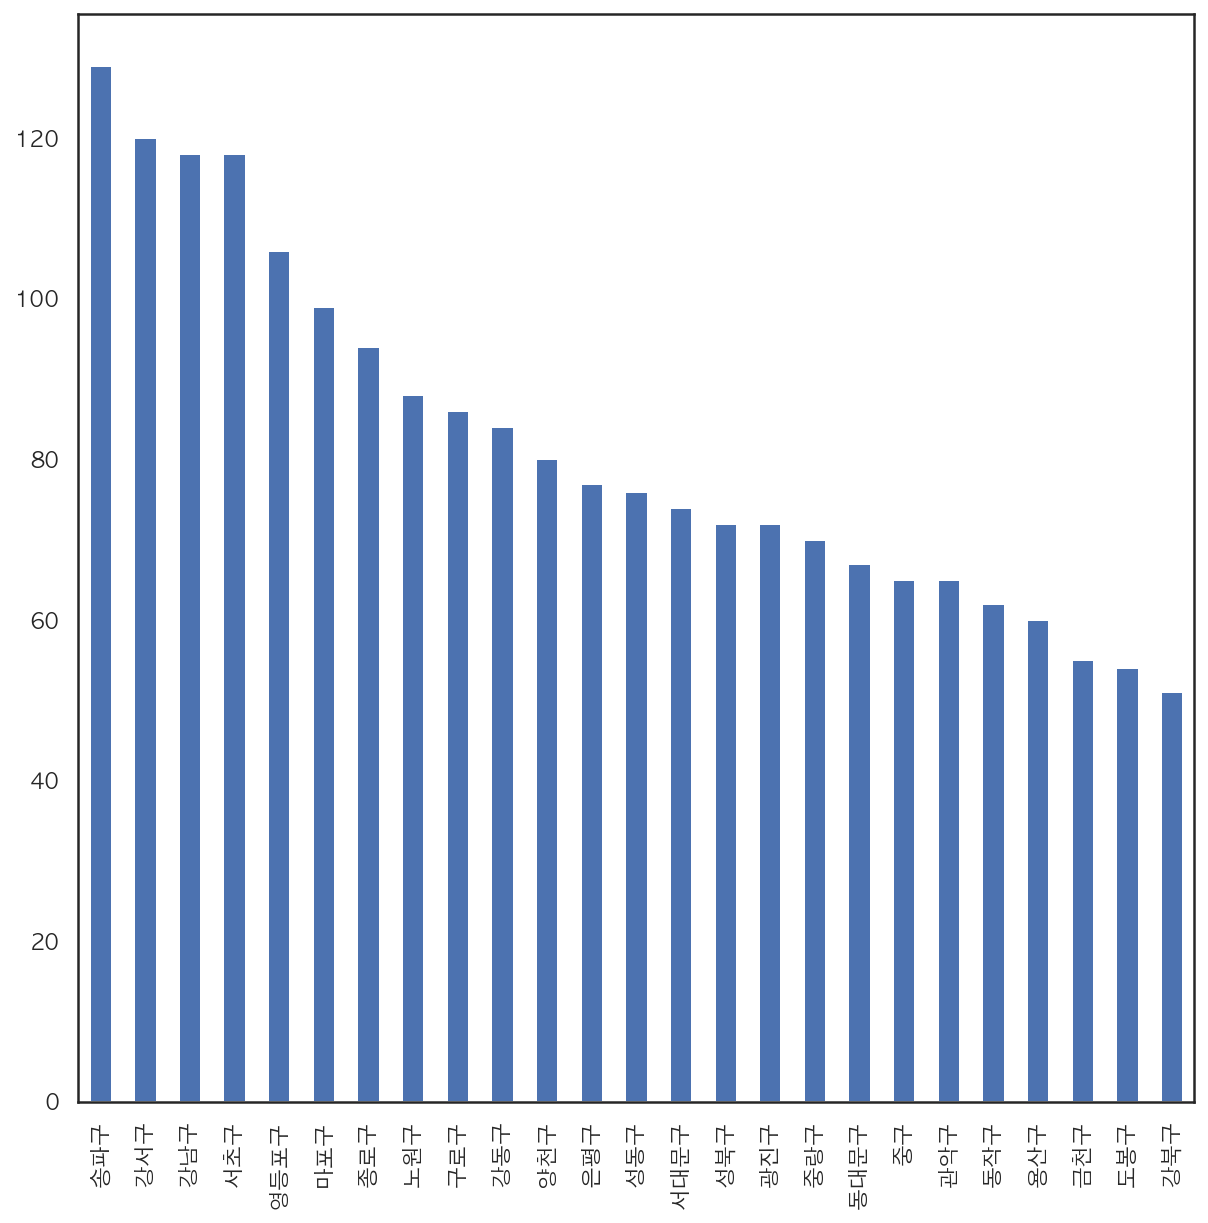

In [26]:
# 설치 장소 현황 그래프로 시각화
plt.figure(figsize=(10,10))
location.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [44]:
sb1907_rent_station = sb1907['rental_station_name'].value_counts()[:21]
sb1907_rent_station

뚝섬유원지역 1번출구 앞              10317
여의나루역 1번출구 앞                9909
봉림교 교통섬                     8405
홍대입구역 2번출구 앞                7567
롯데월드타워(잠실역2번출구 쪽)           7349
건대입구역 사거리(롯데백화점)            6862
마곡나루역 5번출구 뒤편               6466
고속터미널역 8-1번, 8-2번 출구 사이     6442
안암로터리 버스정류장 앞               5824
동방1교                        5654
마포구민체육센터 앞                  5643
신도림역 1번 출구 앞                5601
양천향교역 7번출구앞                 5320
신대방역 2번 출구                  5160
가양역 8번출구                    4996
구로디지털단지역 앞                  4961
잠실새내역 5번 출구 뒤               4952
발산역 1번, 9번 인근 대여소           4838
당산역 10번출구 앞                 4832
자양사거리 광진아크로텔 앞              4662
CJ 드림시티                     4589
Name: rental_station_name, dtype: int64

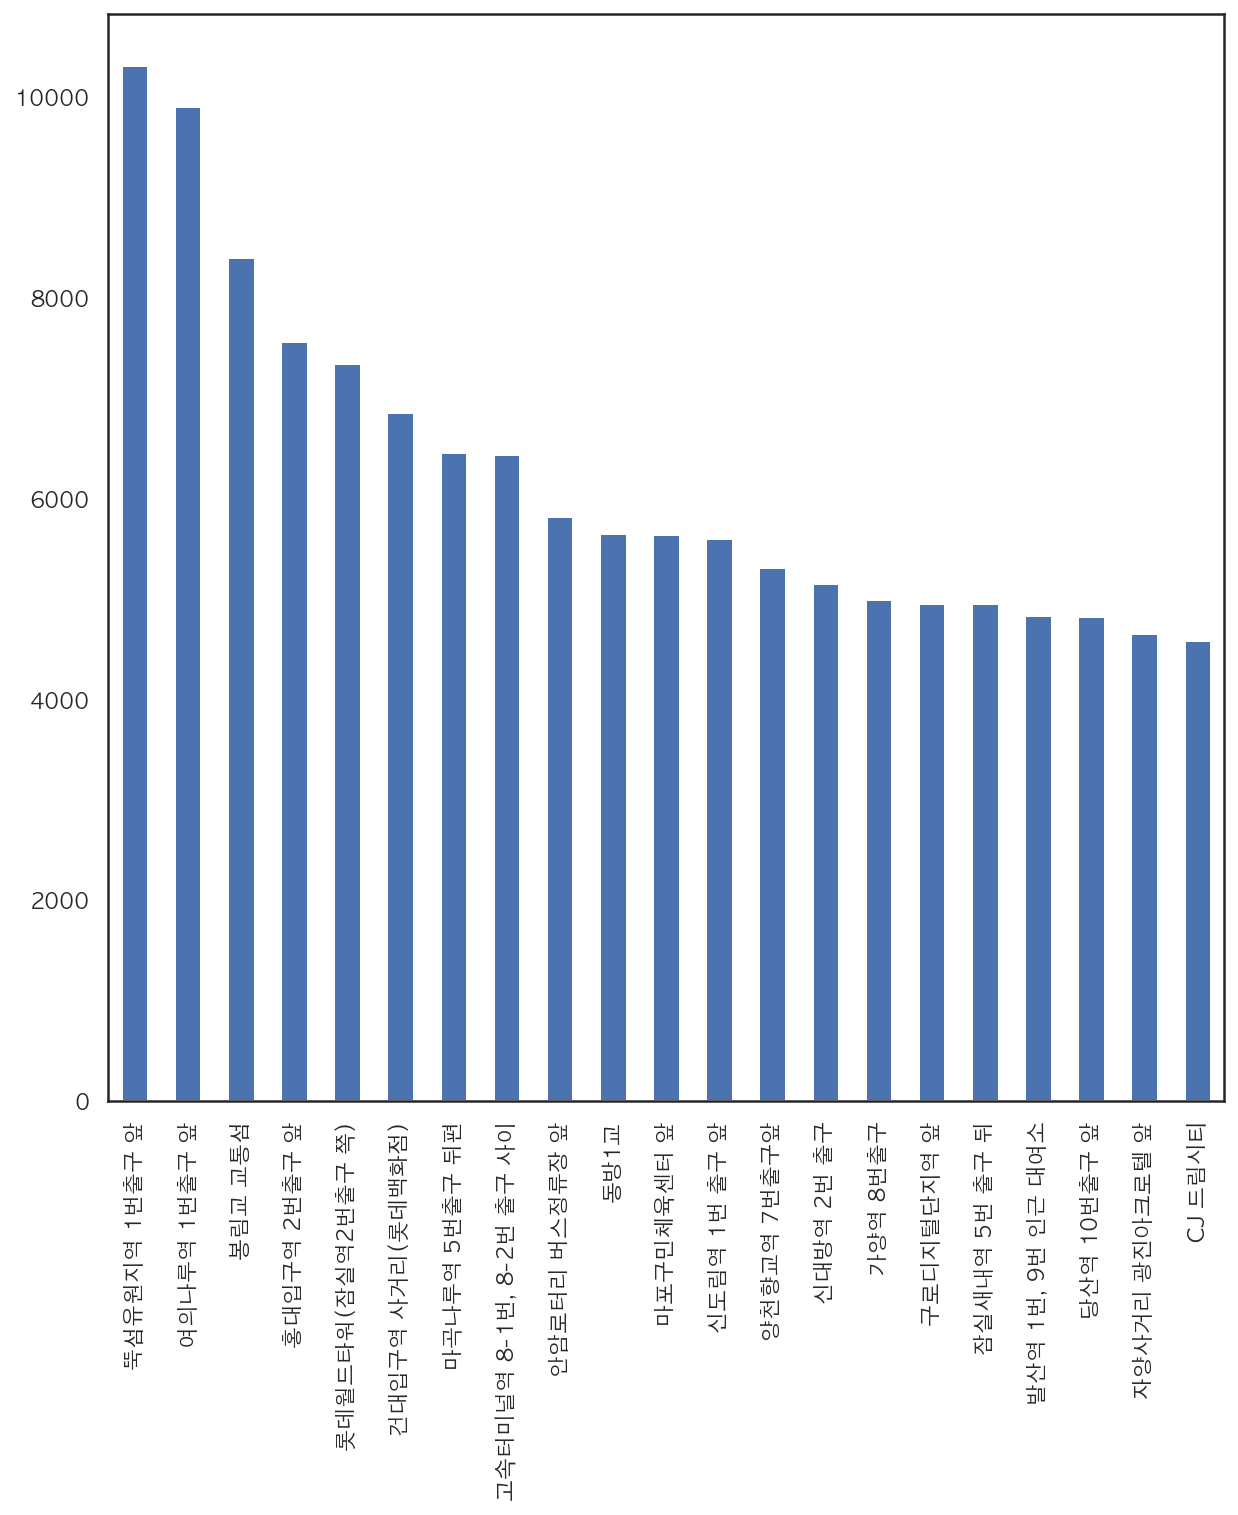

In [45]:
plt.figure(figsize=(10,10))
sb1907_rent_station.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [47]:
sb1907_return_station = sb1907['return_station_name'].value_counts()[:21]
sb1907_return_station

뚝섬유원지역 1번출구 앞              11223
여의나루역 1번출구 앞                9607
홍대입구역 2번출구 앞                9012
봉림교 교통섬                     8506
롯데월드타워(잠실역2번출구 쪽)           7399
건대입구역 사거리(롯데백화점)            7137
고속터미널역 8-1번, 8-2번 출구 사이     6714
마포구민체육센터 앞                  6591
마곡나루역 5번출구 뒤편               6574
안암로터리 버스정류장 앞               6524
CJ 드림시티                     6078
동방1교                        5839
신대방역 2번 출구                  5523
신도림역 1번 출구 앞                5510
양천향교역 7번출구앞                 5187
잠실새내역 5번 출구 뒤               5040
구로디지털단지역 앞                  5001
가양역 8번출구                    4959
발산역 1번, 9번 인근 대여소           4869
당산역 10번출구 앞                 4856
자양사거리 광진아크로텔 앞              4591
Name: return_station_name, dtype: int64

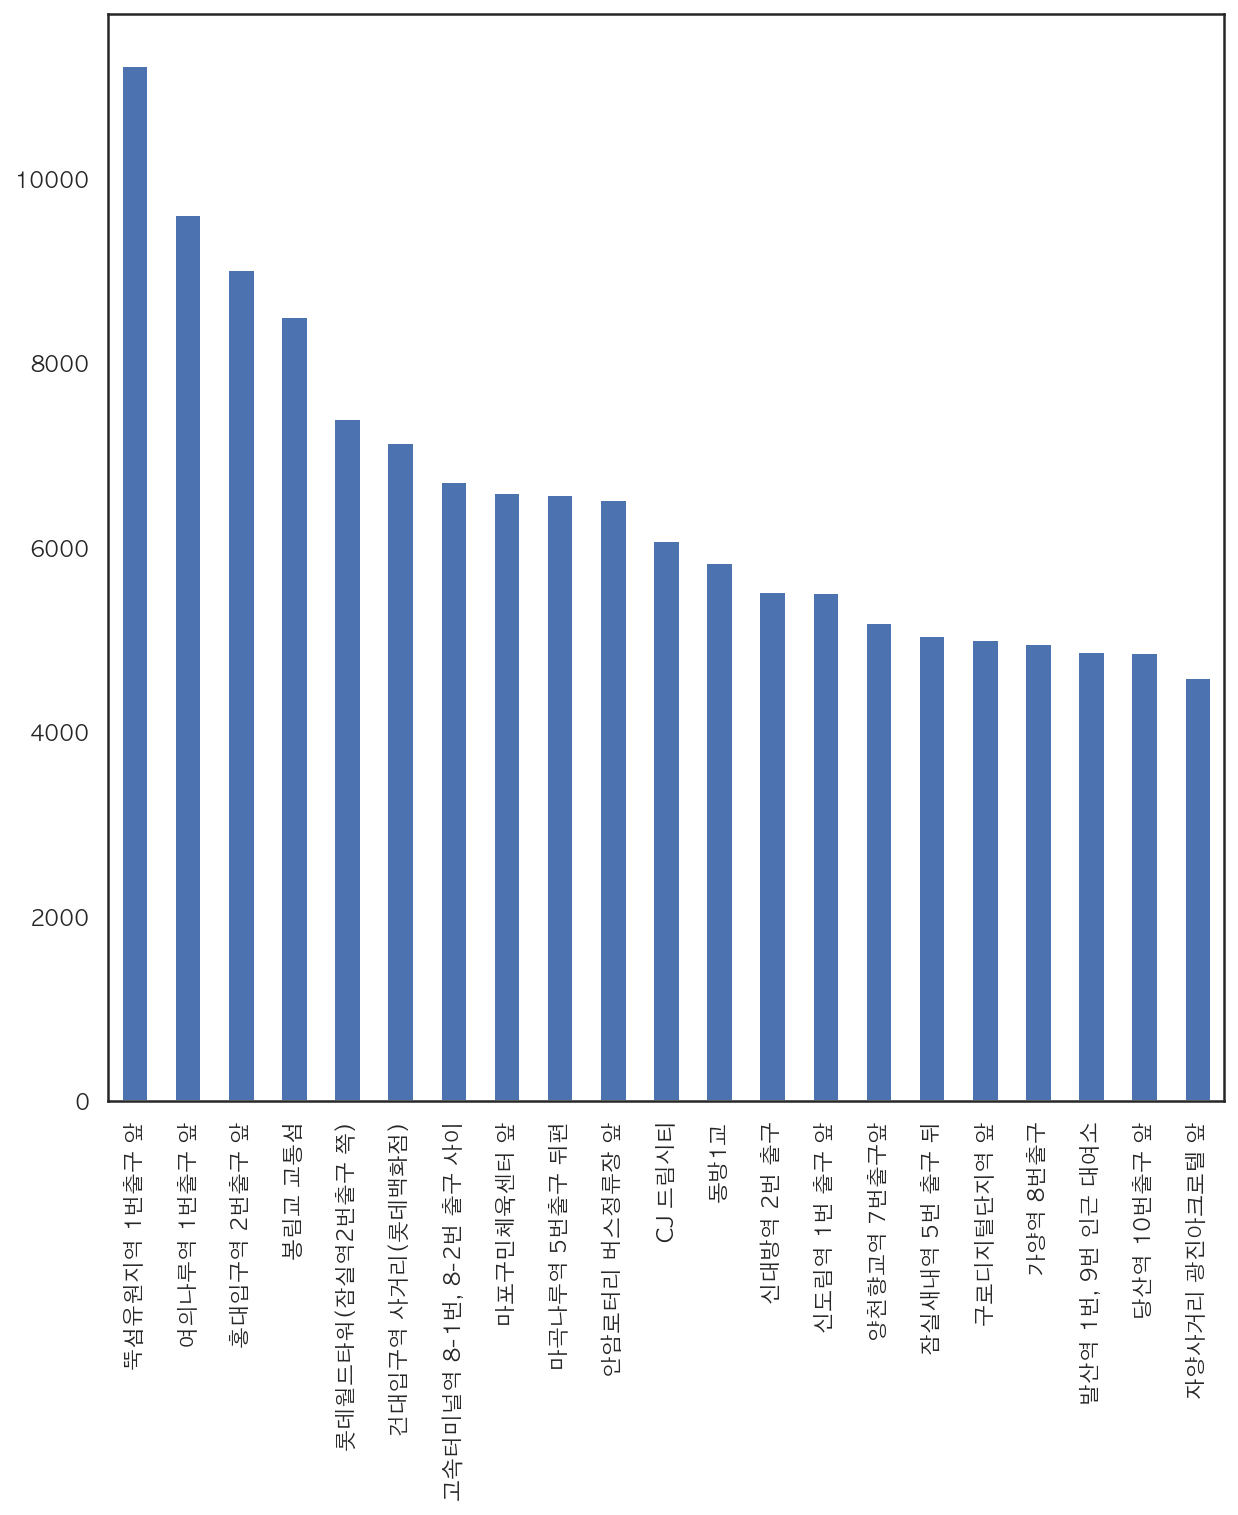

In [48]:
plt.figure(figsize=(10,10))
sb1907_return_station.plot.bar()
plt.rc('font',family='AppleGothic')
plt.show()

In [94]:
sb1907['bicycle_type_num'].value_counts()

1    2082611
Name: bicycle_type_num, dtype: int64

In [95]:
sb1908['bicycle_type_num'].value_counts()

1    2028698
Name: bicycle_type_num, dtype: int64

In [96]:
sb2007['bicycle_type_num'].value_counts()

2    773708
1    580011
Name: bicycle_type_num, dtype: int64

In [97]:
sb2008['bicycle_type_num'].value_counts()

2    676776
1    223582
Name: bicycle_type_num, dtype: int64

In [99]:
station.loc[station['station_name'] == '뚝섬유원지역 1번출구 앞']

station_num   station_name location  longitude    latitude
324        502.0  뚝섬유원지역 1번출구 앞      광진구   37.53186  127.067192

In [103]:
duksum = sb1907.loc[sb1907["rental_station_name"] == '뚝섬유원지역 1번출구 앞']
duksum

rental_station_num  rental_station_name  return_station_num  \
130                      502       뚝섬유원지역 1번출구 앞                2002   
131                      502       뚝섬유원지역 1번출구 앞                2002   
140                      502       뚝섬유원지역 1번출구 앞                 604   
141                      502       뚝섬유원지역 1번출구 앞                 604   
1582                     502       뚝섬유원지역 1번출구 앞                1601   
3151                     502       뚝섬유원지역 1번출구 앞                2262   
3175                     502       뚝섬유원지역 1번출구 앞                2262   
3519                     502       뚝섬유원지역 1번출구 앞                 591   
3520                     502       뚝섬유원지역 1번출구 앞                 591   
3586                     502       뚝섬유원지역 1번출구 앞                2262   
3756                     502       뚝섬유원지역 1번출구 앞                 590   
3849                     502       뚝섬유원지역 1번출구 앞                 590   
3957                     502       뚝섬유원지역 1번출구 앞                 590   
3961                     502       뚝섬유원지역 1번출구 앞                 590   
5108                     502       뚝섬유원지역 1번출구 앞                 825   
5179                     502       뚝섬유원지역 1번출구 앞                 592   
5180                     502       뚝섬유원지역 1번출구 앞                 592   
5181                     502       뚝섬유원지역 1번출구 앞                 592   
5232                     502       뚝섬유원지역 1번출구 앞                 593   
5244                     502       뚝섬유원지역 1번출구 앞                 593   
5434                     502       뚝섬유원지역 1번출구 앞                 593   
5481                     502       뚝섬유원지역 1번출구 앞                 593   
5668                     502       뚝섬유원지역 1번출구 앞                 593   
5679                     502       뚝섬유원지역 1번출구 앞                 593   
5682                     502       뚝섬유원지역 1번출구 앞                 593   
5684                     502       뚝섬유원지역 1번출구 앞                 593   
5694                     502       뚝섬유원지역 1번출구 앞                 593   
5695                     502       뚝섬유원지역 1번출구 앞                 593   
5700                     502       뚝섬유원지역 1번출구 앞                 593   
5704                     502       뚝섬유원지역 1번출구 앞                 593   
5712                     502       뚝섬유원지역 1번출구 앞                 593   
5713                     502       뚝섬유원지역 1번출구 앞                 593   
5714                     502       뚝섬유원지역 1번출구 앞                 593   
5718                     502       뚝섬유원지역 1번출구 앞                 593   
5719                     502       뚝섬유원지역 1번출구 앞                 593   
5724                     502       뚝섬유원지역 1번출구 앞                 593   
5725                     502       뚝섬유원지역 1번출구 앞                 593   
5728                     502       뚝섬유원지역 1번출구 앞                 593   
5730                     502       뚝섬유원지역 1번출구 앞                 593   
5739                     502       뚝섬유원지역 1번출구 앞                 593   
5745                     502       뚝섬유원지역 1번출구 앞                 593   
5749                     502       뚝섬유원지역 1번출구 앞                 593   
5751                     502       뚝섬유원지역 1번출구 앞                 593   
5753                     502       뚝섬유원지역 1번출구 앞                 593   
5764                     502       뚝섬유원지역 1번출구 앞                 825   
7115                     502       뚝섬유원지역 1번출구 앞                 625   
7231                     502       뚝섬유원지역 1번출구 앞                1610   
7327                     502       뚝섬유원지역 1번출구 앞                2013   
7982                     502       뚝섬유원지역 1번출구 앞                1716   
8046                     502       뚝섬유원지역 1번출구 앞                 815   
8185                     502       뚝섬유원지역 1번출구 앞                 815   
8497                     502       뚝섬유원지역 1번출구 앞                2219   
8551                     502       뚝섬유원지역 1번출구 앞                2219   
8940                     502       뚝섬유원지역 1번출구 앞                 614   
9441                     502       뚝섬유원지역 1번출구 앞 

In [105]:
hapjung = sb1907.loc[sb1907["rental_station_name"] == '(구)합정동 주민센터']
hapjung

rental_station_num  rental_station_name  return_station_num  \
20760                    101         (구)합정동 주민센터                 184   
29619                    101         (구)합정동 주민센터                 152   
29692                    101         (구)합정동 주민센터                 152   
30107                    101         (구)합정동 주민센터                 748   
34096                    101         (구)합정동 주민센터                 199   
34784                    101         (구)합정동 주민센터                 151   
38631                    101         (구)합정동 주민센터                2210   
41906                    101         (구)합정동 주민센터                 153   
42021                    101         (구)합정동 주민센터                 153   
45916                    101         (구)합정동 주민센터                 267   
48556                    101         (구)합정동 주민센터                3106   
48575                    101         (구)합정동 주민센터                3106   
55434                    101         (구)합정동 주민센터                 112   
56945                    101         (구)합정동 주민센터                 109   
58816                    101         (구)합정동 주민센터                 103   
58913                    101         (구)합정동 주민센터                 103   
58930                    101         (구)합정동 주민센터                 103   
62314                    101         (구)합정동 주민센터                 101   
62361                    101         (구)합정동 주민센터                 101   
62362                    101         (구)합정동 주민센터                 101   
62364                    101         (구)합정동 주민센터                 101   
62365                    101         (구)합정동 주민센터                 101   
62380                    101         (구)합정동 주민센터                 101   
62395                    101         (구)합정동 주민센터                 101   
62399                    101         (구)합정동 주민센터                 101   
64415                    101         (구)합정동 주민센터                 106   
69163                    101         (구)합정동 주민센터                 105   
71980                    101         (구)합정동 주민센터                 183   
71985                    101         (구)합정동 주민센터                 183   
82272                    101         (구)합정동 주민센터                 182   
84123                    101         (구)합정동 주민센터                 113   
84176                    101         (구)합정동 주민센터                 113   
84177                    101         (구)합정동 주민센터                 113   
94363                    101         (구)합정동 주민센터                 182   
107110                   101         (구)합정동 주민센터                 230   
112094                   101         (구)합정동 주민센터                 229   
112124                   101         (구)합정동 주민센터                 229   
113308                   101         (구)합정동 주민센터                 267   
145143                   101         (구)합정동 주민센터                 107   
145184                   101         (구)합정동 주민센터                 107   
145218                   101         (구)합정동 주민센터                 107   
146316                   101         (구)합정동 주민센터                 106   
146417                   101         (구)합정동 주민센터                 106   
146421                   101         (구)합정동 주민센터                 106   
147932                   101         (구)합정동 주민센터                 109   
149258                   101         (구)합정동 주민센터                 409   
149924                   101         (구)합정동 주민센터                 412   
150421                   101         (구)합정동 주민센터                 102   
150586                   101         (구)합정동 주민센터                 101   
150591                   101         (구)합정동 주민센터                 101   
150593                   101         (구)합정동 주민센터                 101   
150636                   101         (구)합정동 주민센터                 101   
152923                   101         (구)합정동 주민센터                 104   
152926                   101         (구)합정동 주민센터                 104   
152928                   101         (구)합정동 주민센터 

In [109]:
hapjung["rental_station_name"].value_counts()

(구)합정동 주민센터    1014
Name: rental_station_name, dtype: int64

In [110]:
hapjung['return_station_name'].value_counts()

(구)합정동 주민센터                152
합정역 7번출구 앞                  94
합정역 1번출구 앞                  70
마포구민체육센터 앞                  67
망원역 2번출구 앞                  42
망원1동주민센터                    35
망원2빗물펌프장 앞                  31
극동방송국 앞                     31
제일빌딩 앞                      30
합정역 5번출구 앞                  27
홍대입구역 2번출구 앞                24
서울역 서부교차로2                  17
삼성화재 사옥 옆                   17
서울 월드컵 경기장                  15
망원역 1번출구 앞                  15
SK망원동주유소 건너편                15
서교동 사거리                     15
마포구청역                       14
상수역 2번출구 앞                  14
DMC산학협력연구센터 앞               12
베르가모앞                       12
신한은행 서교동금융센터점 앞             11
국회의사당역 3번출구 옆               10
성산2교 사거리                     9
선유도역 3번출구 앞                  8
명지대학교 도서관                    7
그랜드컨벤션센터 앞                   6
KB국민은행 염창역 지점 앞              6
서강대 남문 옆                     6
마포중앙도서관                      5
홍대입구역 8번출구 앞                 5
누리꿈스퀘어 옆                     4
상암월드컵파크 

In [106]:
hapjung.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 20760 to 2082477
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rental_station_num   1014 non-null   int64  
 1   rental_station_name  1014 non-null   object 
 2   return_station_num   1014 non-null   int64  
 3   return_station_name  1014 non-null   object 
 4   using_time           1014 non-null   int64  
 5   using_distance       1014 non-null   float64
 6   rental_day           1014 non-null   object 
 7   rental_time          1014 non-null   object 
 8   return_day           1014 non-null   object 
 9   bicycle_type_num     1014 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 87.1+ KB


In [104]:
duksum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10317 entries, 130 to 2080368
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rental_station_num   10317 non-null  int64  
 1   rental_station_name  10317 non-null  object 
 2   return_station_num   10317 non-null  int64  
 3   return_station_name  10317 non-null  object 
 4   using_time           10317 non-null  int64  
 5   using_distance       10317 non-null  float64
 6   rental_day           10317 non-null  object 
 7   rental_time          10317 non-null  object 
 8   return_day           10317 non-null  object 
 9   bicycle_type_num     10317 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 886.6+ KB


In [83]:
mapo = station.loc[station['location'] == '마포구']
mapo

station_num        station_name location  longitude    latitude
920         101.0         (구)합정동 주민센터      마포구  37.549561  126.905754
921         102.0          망원역 1번출구 앞      마포구  37.555649  126.910629
922         103.0          망원역 2번출구 앞      마포구  37.554951  126.910835
923         104.0          합정역 1번출구 앞      마포구  37.550629  126.914986
924         105.0          합정역 5번출구 앞      마포구  37.550007  126.914825
925         106.0          합정역 7번출구 앞      마포구  37.548645  126.912827
926         107.0     신한은행 서교동금융센터점 앞      마포구  37.557510  126.918503
927         108.0             서교동 사거리      마포구  37.552746  126.918617
928         109.0              제일빌딩 앞      마포구  37.547691  126.919983
929         111.0          상수역 2번출구 앞      마포구  37.547871  126.923531
930         112.0             극동방송국 앞      마포구  37.549202  126.923203
931         113.0        홍대입구역 2번출구 앞      마포구  37.557499  126.923805
932         114.0        홍대입구역 8번출구 앞      마포구  37.557060  126.924423
933         118.0         광흥창역 2번출구 앞      마포구  37.547733  126.931763
934         119.0             서강나루 공원      마포구  37.545284  126.931053
935         120.0             신수동 사거리      마포구  37.545242  126.934113
936         121.0             마포소방서 앞      마포구  37.549767  126.933174
937         122.0            신성기사식당 앞      마포구  37.547459  126.938377
938         124.0          서강대 정문 건너편      마포구  37.551140  126.936989
939         125.0            서강대 남문 옆      마포구  37.549484  126.938950
940         126.0            서강대 후문 옆      마포구  37.550411  126.943848
941         127.0             현대벤처빌 앞      마포구  37.553520  126.936951
942         129.0     신촌역(2호선) 6번출구 옆      마포구  37.555054  126.937569
943         130.0     신촌역(2호선) 7번출구 앞      마포구  37.554859  126.936157
944         136.0            대흥동 주민센터      마포구  37.556004  126.942299
945         142.0          아현역 4번출구 앞      마포구  37.557201  126.955666
946         143.0            공덕역 2번출구      마포구  37.544579  126.950218
947         144.0            공덕역 8번출구      마포구  37.543579  126.951324
948         145.0            공덕역 5번출구      마포구  37.544250  126.951637
949         146.0          마포역 2번출구 뒤      마포구  37.539936  126.945824
950         147.0          마포역 4번출구 뒤      마포구  37.539272  126.945915
951         148.0          용강동 주민센터 앞      마포구  37.542347  126.943024
952         150.0         서강대역 2번출구 앞      마포구  37.552956  126.934341
953         151.0            망원1동주민센터      마포구  37.555687  126.905548
954         152.0          마포구민체육센터 앞      마포구  37.556610  126.898018
955         153.0            성산2교 사거리      마포구  37.564697  126.912613
956         154.0               마포구청역      마포구  37.560909  126.905495
957         155.0          가좌역1 번출구 뒤      마포구  37.568550  126.914513
958         156.0          서울서부지방법원 앞      마포구  37.549904  126.955147
959         157.0         애오개역 4번출구 앞      마포구  37.553001  126.956688
960         181.0            망원초록길 입구      마포구  37.551342  126.902672
961         182.0          망원2빗물펌프장 앞      마포구  37.551567  126.902847
962         183.0       하늘채코오롱아파트 건너편      마포구  37.565166  126.919395
963         184.0        SK망원동주유소 건너편      마포구  37.558949  126.907753
964         185.0           마포 신수공원 앞      마포구  37.542545  126.934296
965         186.0               월드컵공원      마포구  37.563965  126.898209
966         199.0          서울 월드컵 경기장      마포구  37.566845  126.896446
967         400.0      상암한화오벨리스크 1차 앞      마포구  37.587524  126.883003
968         401.0      상암월드컵파크 10단지 앞      마포구  37.586189  126.881615
969         402.0       상암월드컵파크 9단지 앞      마포구  37.582855  126.879822
970         403.0             부엉이공원 앞      마포구  37.585590  126.884727
971         405.0              DMC빌 앞      마포구  37.582657  126.885788
972         406.0       상암월드컵파크 7단지 앞      마포구  37.581314  126.880585
973         407.0        마포구 육아종합지원센터      마포구  37.580631  126.883675
974         408.0             LG CNS앞      마포구  37.580811  126.886650
975         409.0            누리꿈스퀘어 옆      마포구  37.579399  126.889160
976         410.

In [57]:
mapo_location = mapo['station_name'].value_counts()
mapo_location

성산시영아파트               1
마포소방서 앞               1
부엉이공원 앞               1
마포 신수공원 앞             1
상암월드컵파크 3단지 후문        1
현대벤처빌 앞               1
서교동사거리                1
상수역 2번출구 앞            1
신성기사식당 앞              1
하늘공원 입구               1
신한은행 서교동금융센터점 앞       1
홍대입구역 8번출구 앞          1
홍대입구역 6번출구            1
대흥동 주민센터              1
신촌역(2호선) 6번출구 옆       1
상암한화오벨리스크 1차 앞        1
DMC홍보관                1
신촌역(2호선) 7번출구 앞       1
망원1동주민센터              1
공덕역 8번출구              1
망원역 2번출구 앞            1
롯데하이마트 (상암월드컵점)       1
DMC빌 앞                1
누리꿈스퀘어 옆              1
망원역 1번출구 앞            1
상암월드컵파크 10단지 앞        1
(구)합정동 주민센터           1
서울 월드컵 경기장            1
마포구청역                 1
월드컵공원                 1
래미안공덕3차아파트            1
마포구청 청사내              1
신수동주민센터               1
마포역 4번출구 뒤            1
공덕역 2번출구              1
서강나루 공원               1
하늘채코오롱아파트 건너편         1
DMC역 9번출구 앞           1
월드컵파크 4단지             1
합정동주민센터 앞             1
문화비축기지                1
경의선(노고산동)       

In [89]:
import folium
from folium.plugins import MarkerCluster
import folium.features 

location = np.array([37.5665, 126.9780]) # 위도 경도 값
fmap = folium.Map(location, zoom_start=12) # zoom : 0 ~ 18 설정, 클수록 크게 나옴.
fmap

In [91]:
map = folium.Map(location=[mapo['longitude'].mean(), mapo['latitude'].mean()], zoom_start=12)

for n in mapo.index:
    # 팝업에 들어갈 텍스트를 지정 
    popup_name = mapo.loc[n, "station_name"]
    # 스테이션마다 아이콘 지정 
    if station.loc[n, 'station_name']:
        icon_color = "green"
    else:
        icon_color = "blue"
        
    folium.features.Marker(
        location=[mapo.loc[n, 'longitude'], mapo.loc[n, 'latitude']],
        radius=3,
        popup=popup_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

In [92]:
songpa = station.loc[station['location'] == '송파구']
songpa

station_num               station_name location  longitude    latitude
1829       1201.0                가락시장역 3번 출구      송파구  37.493179  127.118546
1830       1203.0                  밀리아나2빌딩 앞      송파구  37.493729  127.120621
1831       1204.0                   거여역 3번출구      송파구  37.493343  127.144730
1832       1205.0                종합운동장역 4번출구      송파구  37.510429  127.071373
1833       1206.0             9호선종합운동장역 9번출구      송파구  37.511280  127.078239
1834       1207.0                  마천CU우방점 앞      송파구  37.499756  127.152504
1835       1208.0                  풍납현대아파트쉼터      송파구  37.529675  127.119789
1836       1209.0            잠실나루역 (2번 출구 쪽)      송파구  37.520451  127.104202
1837       1210.0          롯데월드타워(잠실역2번출구 쪽)      송파구  37.513126  127.100960
1838       1211.0                      방이삼거리      송파구  37.512104  127.107780
1839       1212.0                 송파역 2번 출구앞      송파구  37.499413  127.112869
1840       1213.0                     백토공원 앞      송파구  37.507660  127.132736
1841       1214.0               오금역 7번 출구 인근      송파구  37.502594  127.127647
1842       1215.0              올림픽공원역 1번출구 앞      송파구  37.516571  127.131538
1843       1217.0                 송파파인타운 7단지      송파구  37.479305  127.129799
1844       1218.0                   방이역 4번출구      송파구  37.508968  127.125839
1845       1220.0           잠실본동주민센터뒤 잠실근린공원      송파구  37.505692  127.084038
1846       1221.0                삼전사거리 포스코더샵      송파구  37.504200  127.087532
1847       1222.0              잠실새내역 5번 출구 뒤      송파구  37.511982  127.085052
1848       1224.0              아시아지하보도 2번 출구      송파구  37.512169  127.078934
1849       1226.0                잠실4동 주민센터 옆      송파구  37.520077  127.112366
1850       1227.0                 거여역 8번출구 뒤      송파구  37.493126  127.143822
1851       1228.0                      마천사거리      송파구  37.497700  127.146202
1852       1229.0                 송파체육문화회관 앞      송파구  37.490688  127.143127
1853       1230.0                   송파중학교 정문      송파구  37.495670  127.130592
1854       1231.0                   잠실역 6번출구      송파구  37.514088  127.099030
1855       1232.0                 롯데마트 주차장 옆      송파구  37.512089  127.096191
1856       1233.0             잠실3거리(갤러리아팰리스)      송파구  37.510509  127.093369
1857       1235.0               잠실트리지움310동 옆      송파구  37.508339  127.088142
1858       1239.0                   문정 법조단지3      송파구  37.480843  127.118011
1859       1240.0                   문정 법조단지4      송파구  37.480576  127.118568
1860       1241.0                   문정 법조단지5      송파구  37.481239  127.119797
1861       1242.0                   문정 법조단지6      송파구  37.482090  127.119743
1862       1243.0                   문정 법조단지7      송파구  37.484531  127.120163
1863       1244.0                   문정 법조단지8      송파구  37.481537  127.122124
1864       1245.0                   문정 법조단지9      송파구  37.479465  127.125328
1865       1246.0                  문정 법조단지10      송파구  37.477509  127.126328
1866       1247.0                  문정 법조단지11      송파구  37.478821  127.123512
1867       1248.0                     방이초등학교      송파구  37.513962  127.121674
1868       1249.0                   아주중학교건너편      송파구  37.505463  127.077347
1869       1250.0                  문정2동 주민센터      송파구  37.489872  127.110840
1870       1251.0                   석촌역 2번출구      송파구  37.505932  127.107750
1871       1253.0                오금역 3번 출구 뒤      송파구  37.501652  127.128181
1872       1256.0                문정현대아파트 교차로      송파구  37.491131  127.125809
1873       1257.0                가락시장역 롯데마트앞      송파구  37.492100  127.117752
1874       1258.0                  가락미륭아파트 앞      송파구  37.493198  127.128998
1875       1259.0                   방이역 1번출구      송파구  37.508984  127.126595
1876       1260.0              방이동 한양3차아파트 옆      송파구  37.506302  127.121399
1877       1262.0                 송파여성문화회관 앞      송파구  37.505802  127.109718
1878       1263.0                    장지공영차고지      송파구  37.480541  127.137016
1879       1264.0               천호역 10번 출구 앞      송파구  37.538582  127.122803
18

In [93]:
map = folium.Map(location=[songpa['longitude'].mean(), songpa['latitude'].mean()], zoom_start=12)

for n in songpa.index:
    # 팝업에 들어갈 텍스트를 지정 
    popup_name = songpa.loc[n, "station_name"]
    # 스테이션마다 아이콘 지정 
    if songpa.loc[n, 'station_name']:
        icon_color = "green"
    else:
        icon_color = "blue"
        
    folium.features.Marker(
        location=[songpa.loc[n, 'longitude'], songpa.loc[n, 'latitude']],
        radius=3,
        popup=popup_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

In [56]:
pd.set_option('display.max_rows', None)

In [27]:
# 마포구 스테이션 위치 상황 
mapo_num = [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 
        114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 
        136, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 
        154, 155, 156, 157, 181, 182, 183, 184, 185, 186, 199, 400, 
        401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 
        414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 
        427, 432, 436, 437, 438, 439, 440, 487, 489, 490, 491, 492, 
        493, 494, 495, 497, 498, 3002, 3003, 3005, 3006, 3007, 3008, 
        3009, 3010, 3011, 4202]

In [28]:
# 마포구 스테이션 지정 함수 
def filtering_station(df):
    mapo = [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 
        114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 
        136, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 
        154, 155, 156, 157, 181, 182, 183, 184, 185, 186, 199, 400, 
        401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 
        414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 
        427, 432, 436, 437, 438, 439, 440, 487, 489, 490, 491, 492, 
        493, 494, 495, 497, 498, 3002, 3003, 3005, 3006, 3007, 3008, 
        3009, 3010, 3011, 4202]
    df = df[df['rental_station_num'].isin(mapo)]
    return df

In [29]:
sb1907

rental_station_num  rental_station_name  return_station_num  \
0                        153            성산2교 사거리                 934   
1                       2373            개포동역 사거리                2246   
2                       2255        시민의숲역 1번출구 옆                2246   
3                       2255        시민의숲역 1번출구 옆                2246   
4                       2255        시민의숲역 1번출구 옆                2246   
...                      ...                 ...                 ...   
2082606                  720          서울강월초등학교 앞                 706   
2082607                  707            신정3동주민센터                 706   
2082608                  758             한사랑교회 앞                 706   
2082609                 1625           상계역(4번출구)                1608   
2082610                 2169            봉천역 2번출구                2056   

        return_station_name  using_time  using_distance  rental_day  \
0                    신사동 성당          43          6160.0  2019-07-01   
1               서울시 품질시험소 앞          19          4540.0  2019-07-01   
2               서울시 품질시험소 앞           9          1550.0  2019-07-01   
3               서울시 품질시험소 앞           7          1240.0  2019-07-01   
4               서울시 품질시험소 앞           6          1420.0  2019-07-01   
...                     ...         ...             ...         ...   
2082606              신정네거리역          11             0.0  2019-07-31   
2082607              신정네거리역           7           920.0  2019-07-31   
2082608              신정네거리역           7          1270.0  2019-07-31   
2082609         공릉역 1번 출구 앞          39          3850.0  2019-07-31   
2082610           동작구민 체육센터          17          3160.0  2019-07-31   

        rental_time return_day  bicycle_type_num  
0          00:49:10   01:33:11                 1  
1          08:20:55   08:40:42                 1  
2          08:35:20   08:44:56                 1  
3          08:37:26   08:45:25                 1  
4          08:41:45   08:48:40                 1  
...             ...        ...               ...  
2082606    05:50:02   06:01:37                 1  
2082607    12:56:18   13:03:43                 1  
2082608    17:02:06   17:09:48                 1  
2082609    20:25:11   21:06:57                 1  
2082610    19:13:12   19:31:14                 1  

[2082611 rows x 10 columns]

In [31]:
group1= sb1907.groupby(sb1907['rental_day']).count()
group1

rental_station_num   rental_station_name  return_station_num  \
rental_day                                                                 
2019-07-01                89237                89237               89237   
2019-07-02                91134                91134               91134   
2019-07-03                91018                91018               91018   
2019-07-04                86945                86945               86945   
2019-07-05                80890                80890               80890   
2019-07-06                67641                67641               67641   
2019-07-07                72353                72353               72353   
2019-07-08                89995                89995               89995   
2019-07-09                92287                92287               92287   
2019-07-10                42135                42135               42135   
2019-07-11                62576                62576               62576   
2019-07-12                91082                91082               91082   
2019-07-13                78130                78130               78130   
2019-07-14                71400                71400               71400   
2019-07-15                55741                55741               55741   
2019-07-16                79101                79101               79101   
2019-07-17                81062                81062               81062   
2019-07-18                78554                78554               78554   
2019-07-19                74479                74479               74479   
2019-07-20                54444                54444               54444   
2019-07-21                44449                44449               44449   
2019-07-22                79653                79653               79653   
2019-07-23                80002                80002               80002   
2019-07-24                56779                56779               56779   
2019-07-25                33619                33619               33619   
2019-07-26                21921                21921               21921   
2019-07-27                49063                49063               49063   
2019-07-28                22475                22475               22475   
2019-07-29                71392                71392               71392   
2019-07-30                67193                67193               67193   
2019-07-31                25861                25861               25861   

            return_station_name  using_time  using_distance  rental_time  \
rental_day                                                                 
2019-07-01                89237       89237           89237        89237   
2019-07-02                91134       91134           91134        91134   
2019-07-03                91018       91018           91018        91018   
2019-07-04                86945       86945           86945        86945   
2019-07-05                80890       80890           80890        80890   
2019-07-06                67641       67641           67641        67641   
2019-07-07                72353       72353           72353        72353   
2019-07-08                89995       89995           89995        89995   
2019-07-09                92287       92287           92287        92287   
2019-07-10                42135       42135           42135        42135   
2019-07-11                62576       62576           62576        62576   
2019-07-12                91082       91082           91082        91082   
2019-07-13                78130       78130           78130        78130   
2019-07-14                71400       71400           71400        71400   
2019-07-15                55741       55741           55741        55741   
2019-07-16                79101       79101           79101        79101   
2019-07-17                81062       81062           81062        81062   
2019-07-18                78554       78554           78554